In [1]:
import pandas
from time import time

cols = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

kddData = pandas.read_csv("kddcupFull.csv", header=None, names = cols)

In [2]:
featureNames = [
    "duration","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate"
]

features = kddData[featureNames].astype(float)

In [3]:
labels = kddData['label'].copy()
labels[labels!='normal.'] = 'attack.'

normal.    595798
attack.    452778
Name: label, dtype: int64

In [4]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(features,labels)

Classified in 14.389 seconds


In [5]:
kddDataTest = pandas.read_csv("corrected.csv", header=None, names = featureNames)
kddDataTest['label'].value_counts()

testData = kddDataTest[num_features].astype(float)
trueLabels = kddDataTest['label'].copy()
true_labels[true_labels!='normal.'] = 'attack.'

In [15]:
kddData[featureNames]

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,105,146,0,0,0,0,0,0,0,...,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
1,0,105,146,0,0,0,0,0,0,0,...,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
2,0,105,146,0,0,0,0,0,0,0,...,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
3,0,105,146,0,0,0,0,0,0,0,...,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
4,0,105,146,0,0,0,0,0,0,0,...,255,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311024,0,105,147,0,0,0,0,0,0,0,...,255,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0
311025,0,105,147,0,0,0,0,0,0,0,...,255,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0
311026,0,105,147,0,0,0,0,0,0,0,...,255,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0
311027,0,105,147,0,0,0,0,0,0,0,...,255,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0


In [6]:
pred = clf.predict(testData)
new_labels = pred

Assigned labels in 0.121 seconds




Accuracy 92.436 %


Confusion Matrix: 

 [[227237  23199]
 [   328  60265]]


Classification Scores: 

               precision    recall  f1-score   support

     attack.       1.00      0.91      0.95    250436
     normal.       0.72      0.99      0.84     60593

    accuracy                           0.92    311029
   macro avg       0.86      0.95      0.89    311029
weighted avg       0.94      0.92      0.93    311029



Hamming Loss 0.07564246420751762


Jaccard Score 0.8697566979189335


Matthews corrcoef 0.8061964634758509


Zero-One Loss 0.07564246420751763


<AxesSubplot:>

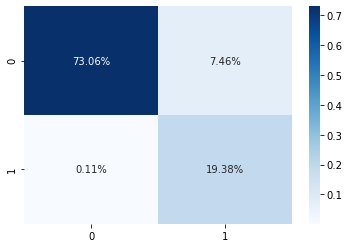

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score = accuracy_score(true_labels, new_labels)
print("\n\nAccuracy {} %".format(round(accuracy_score*100,3)))

confusion_matrix = confusion_matrix(true_labels, new_labels)
print("\n\nConfusion Matrix: \n\n {}".format(confusion_matrix))

classification_report = classification_report(true_labels, new_labels)
print("\n\nClassification Scores: \n\n {}".format(classification_report))

import seaborn as sns
import numpy as np
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.2%', cmap='Blues')